# <center>Threshold Optimization for Classification Problem</center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
  - **1.1** [**Threshold Optimization for Classification Problem**](#Section11)
  - **1.2** [**Youden's J statistics**](#Section12)
  - **1.3** [**Importing data from Kaggle**](#Section13)

**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)
  - **3.3** [**Importing Dataset from Kaggle**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)
  - **4.3** [**Data Pre Profiling**](#Section43)

**5.** [**Data Processing & Feature Selection**](#Section5)<br>
  - **5.1** [**Splittng the data**](#Section51)<br>

**6.** [**Model Development & Evaluation**](#Section6)<br>
  - **6.1** [**Logistic Regression Model**](#Section61)<br>
  - **6.2** [**Evaluating the Model**](#Section62)<br>
  - **6.3** [**Plotting Curves**](#Section63)<br>
  - **6.4** [**Metrics for ROC Threshold**](#Section64)<br>
  - **6.5** [**Metrics for PR Threshold**](#Section65)<br>
  - **6.6** [**Effects of Threshold on Metrics**](#Section66)<br>
  
**7.** [**Conclusion**](#Section7)<br>



---
<a name = Section1></a>
# **1. Introduction**
---

<br>

<a name = Section11></a>
### **1.1 Threshold Optimization for Classification Problem**

Threshold optimization is a **technique** used in classification problems to improve the performance of a model by **adjusting the threshold** used to map **probabilities** to class labels.

- In a **binary classification** problem, a model predicts a probability or scoring of **class membership**. This probability is then converted into a **class label** using a threshold. All values equal or greater than the threshold are **mapped** to one class and all other values are mapped to another class.

- However, for classification problems that have a severe **class imbalance**, the default threshold can result in **poor performance**. Therefore, the **threshold** can be tuned to **improve the performance** of the classifier. This process of tuning the threshold is called **threshold moving**.

- The **optimal** or best threshold is one that **maximizes** the score of a specified performance metric. In some cases, such as when using ROC Curves and Precision-Recall Curves, the best or optimal threshold for the classifier can be **calculated** directly. In other cases, it is possible to use a **grid search** to tune the threshold and **locate** the optimal value.

- In **multiclass classification** problems where labels are mutually exclusive, you have a **multinomial probability distribution**. In this kind of scenario, the decision rule usually is simply picking the **highest probability class**. However, in cases where labels are **not mutually exclusive**, each label's threshold can be individually selected just like in the binary classification case.



<center><img src ="https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-08-05-ROC/pic5_en.gif" width = "60%" /></center>

<br>

<a name = Section12></a>
### **1.2 Youden's J statistics**

Youden's J statistic is a **single statistic** that **captures** the **performance** of a dichotomous diagnostic test. It is defined as `sensitivity + specificity - 1`.

Its value ranges from **-1 through 1 (inclusive)**, and has a **zero value** when a diagnostic test gives the same proportion of positive results for groups with and without the disease, i.e., **the test is useless**. A value of **1** indicates that there are no false positives or false negatives, i.e., **the test is perfect.**

In terms of **threshold optimization**, Youden's index is often used in conjunction with receiver operating characteristic **(ROC) analysis**. The index is defined for all points of an ROC curve, and the **maximum value of the index** may be used as a **criterion** for selecting the **optimum cut-off point** when a diagnostic test gives a numeric rather than a dichotomous result. The index is represented **graphically** as the height above the chance line, and it is also **equivalent to the area under the curve** subtended by a single operating point.



<center><img src ="https://www.statalist.org/forums/filedata/fetch?id=1471429&d=1542812786&type=full" width = "80%" /></center>

<br>

<a name = Section13></a>
### **1.3 Importing data from Kaggle**

For **importing** any dataset from kaggle, go to your kaggle [account](https://www.kaggle.com/).

Then, go to **right navigation**, where you profle picture be there. Click on that, and go to `Settings`.

<center><img src ="https://drive.google.com/uc?export=download&id=1_nqhxB1ckNxsNpaZO9LwNFu--laVOlDW" width = "40%" /></center>

After that, Click on `Create New Token`. A **json** file will get downloaded.

<center><img src ="https://drive.google.com/uc?export=download&id=1y-VPBoRCNvd2pOoAf2XUANjztTNHOdxc" width = "80%" /></center>

Upload `kaggle.json` on your colab notebook, and **get started**.

---
<a name = Section2></a>
# **2. Problem Statement**
---
The problem statement is to **diagnostically** **predict** whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The dataset consists of several medical predictor variables and one **target variable, Outcome**. All patients in the dataset are females at least 21 years old of **Pima Indian heritage**.

The goal is to build a machine learning model that can **accurately** predict whether or not the patients in the dataset have **diabetes**. To find the **optimal threshold** for **optimizing** ROC and Precision-Recall Curve with the help of **Youden's J statistics**, and to see the **effects of thresholds** on evaluaton metrics.

<center><img src ="https://www.yashodahospitals.com/wp-content/uploads/diabetes-symptoms-and-treatment.jpg" width = "60%" /></center>

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install --upgrade kaggle
!pip install --upgrade ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.3-py3-none-any.whl size=111919 sha256=29b1416fea3b9db5533ac2a1964caea93b4635ac0bcc7f9a4ae617f413502e30
  Stored in directory: /Users/harshalvibhandik/Library/Caches/pip/wheels/86/bc/b2/99460b4db22375a6103c397037ca1689f6cf7e51813e44452d
Successfully built kaggle
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 6.6 MB/s eta 0:00:00a 0:00:01


  Attempting uninstall: ydata_profiling
    Found existing installation: ydata-profiling 4.6.3
    Uninstalling ydata-profiling-4.6.3:
      Successfully uninstalled ydata-profiling-4.6.3


<a name = Section32></a>
### **3.2 Importing Libraries**

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
import ydata_profiling                                              # Import ydata profiling package
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration
import seaborn as sns                                               # Importing Seaborn for data visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # To see the accuracy of the model
from sklearn.metrics import precision_score                         # To see the precision of the model
from sklearn.metrics import recall_score                            # To see the recall of the model
from sklearn.metrics import f1_score                                # To see the f1 score of the model
from sklearn.metrics import confusion_matrix                        # To see the confusion matrix of the model
from sklearn.metrics import ConfusionMatrixDisplay                  # To visualize the confusion matrix
from sklearn.metrics import classification_report                   # To view the classification report of the model
from sklearn.metrics import auc                                     # To view the auc score of the model
from sklearn.metrics import precision_recall_curve                  # To plot the precision and recall of the model
from sklearn.metrics import roc_curve                               # To plot the roc of the model
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LogisticRegression                 # To create a logistic regression classification model using algorithm
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

<a name = Section33></a>
### **3.3 Importing dataset from Kaggle**

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip

cp: kaggle.json: No such file or directory
chmod: /Users/harshalvibhandik/.kaggle/kaggle.json: No such file or directory
Traceback (most recent call last):
  File "/Users/harshalvibhandik/opt/anaconda3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Users/harshalvibhandik/opt/anaconda3/lib/python3.9/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/Users/harshalvibhandik/opt/anaconda3/lib/python3.9/site-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /Users/harshalvibhandik/.kaggle. Or use the environment method.
unzip:  cannot find or open pima-indians-diabetes-database.zip, pima-indians-diabetes-database.zip.zip or pima-indians-diabetes-database.zip.ZIP.


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset consists of various attributes associated with **Pima Indian heritage women's health and diabetes status**.
- These **attributes** include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
- The **target** variable is **“Outcome”** which indicates whether or not a patient has diabetes.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 768 | 9 | 23.1 Kb|
<br>

| Id | Features | Description |
| :-- | :--| :--|
|01|**Pregnancies**|Number of times pregnant.|
|02|**Glucose**|Plasma glucose concentration a 2 hours in an oral glucose tolerance test.|
|03|**BloodPressure**|Diastolic blood pressure (mm Hg).|
|04|**SkinThickness**|Triceps skin fold thickness (mm).|
|05|**Insulin**|2-Hour serum insulin (mu U/ml).|
|06|**BMI**|Body mass index (weight in kg/(height in m)^2).|
|07|**DiabetesPedigreeFunction**|Diabetes pedigree function (a function which scores likelihood of diabetes based on family history).|
|08|**Age**|Age (years).|
|09|**Outcome**|Class variable (0 or 1) where '0' denotes patient is not diabetic and '1' denotes patient is diabetic.|

In [4]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60000,0.62700,50,1
1,1,85,66,29,0,26.60000,0.35100,31,0
2,8,183,64,0,0,23.30000,0.67200,32,1
3,1,89,66,23,94,28.10000,0.16700,21,0
4,0,137,40,35,168,43.10000,2.28800,33,1


In [5]:
data.shape

(768, 9)

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00000,768.00000,768.00000,768.00000,768.00000,768.00000,768.00000,768.00000,768.00000
mean,3.84505,120.89453,69.10547,20.53646,79.79948,31.99258,0.47188,33.24089,0.34896
std,3.36958,31.97262,19.35581,15.95222,115.24400,7.88416,0.33133,11.76023,0.47695
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.07800,21.00000,0.00000
25%,1.00000,99.00000,62.00000,0.00000,0.00000,27.30000,0.24375,24.00000,0.00000
50%,3.00000,117.00000,72.00000,23.00000,30.50000,32.00000,0.37250,29.00000,0.00000
75%,6.00000,140.25000,80.00000,32.00000,127.25000,36.60000,0.62625,41.00000,1.00000
max,17.00000,199.00000,122.00000,99.00000,846.00000,67.10000,2.42000,81.00000,1.00000


**Observation:**

- The **average number of pregnancies** is around **3.85**.
- The **average age** is approximately **33.24 years**.
- The **average diabetes pedigree function score** is around **0.47**.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observation:**

- There are **768** entries and **9** columns
- There are **2** float and **7** int datatypes
- **Outcome** is the **target** variable which is **categorical** in nature

<a name = Section43></a>
### **4.3 Data Pre Profiling**
- To get a quick and comprehensive **overview** of the dataset's characteristics and statistics, **```pandas_profiling```** is used.
- It helps in making **informed decisions** during the **data analysis and preprocessing stages**.




In [9]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df=data)
profile.to_file(output_file="Ydata_Profiling_Report.html")
print('Pre-Profiling Report Ready to Download!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-Profiling Report Ready to Download!


**Observation:**

- There are **8 numerical** and **1 categorical** data columns.
- There are **no missing data**.
- There are **no duplicated** data.

<a name = Section7></a>

---
# **5. Data Processing & Feature Selection**
---

<a name = Section51></a>
### **5.1 Splitting the data**



In [10]:
# Prepare the data
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"The shape of training features: {X_train.shape}")
print(f"The shape of testing features: {X_test.shape}")
print(f"The shape of training target: {y_train.shape}")
print(f"The shape of testing target: {y_test.shape}")

The shape of training features: (614, 8)
The shape of testing features: (154, 8)
The shape of training target: (614,)
The shape of testing target: (154,)


<a name = Section6></a>

---
# **6. Model Development & Evaluation**
---
- We will use **Logistic Regression** to classify the heist.
- This model will help us in **analyzing** the data in more **detail**.

<a name = Section61></a>

## **6.1 Logistic Regression Model**

In [11]:
# Create a logistic regression classifier
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Predict probabilities
y_probs = clf.predict_proba(X_test)[:, 1]

<a name = Section62></a>

## **6.2 Evaluating the model**

In [13]:
# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

In [14]:
# Calculate precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)

In [15]:
# Calculate Youden's J statistic for each threshold
youden_j = tpr - fpr
print(f"Youden's J statistics: \n{youden_j}")
optimal_threshold_roc = thresholds_roc[np.argmax(youden_j)]
optimal_threshold_pr = thresholds_pr[np.argmax(youden_j)]

Youden's J statistics: 
[0.         0.01851852 0.09259259 0.08259259 0.11962963 0.10962963
 0.12814815 0.11814815 0.21074074 0.20074074 0.21925926 0.20925926
 0.2462963  0.2362963  0.29185185 0.28185185 0.30037037 0.28037037
 0.31740741 0.30740741 0.34444444 0.32444444 0.36148148 0.35148148
 0.37       0.35       0.36851852 0.32851852 0.36555556 0.35555556
 0.39259259 0.37259259 0.4837037  0.4737037  0.51074074 0.50074074
 0.51925926 0.50925926 0.52777778 0.48777778 0.5062963  0.4862963
 0.54185185 0.53185185 0.55037037 0.53037037 0.54888889 0.47888889
 0.49740741 0.47740741 0.49592593 0.48592593 0.52296296 0.43296296
 0.45148148 0.17148148 0.19       0.        ]


<a name = Section63></a>

## **6.3 Plotting Curves**

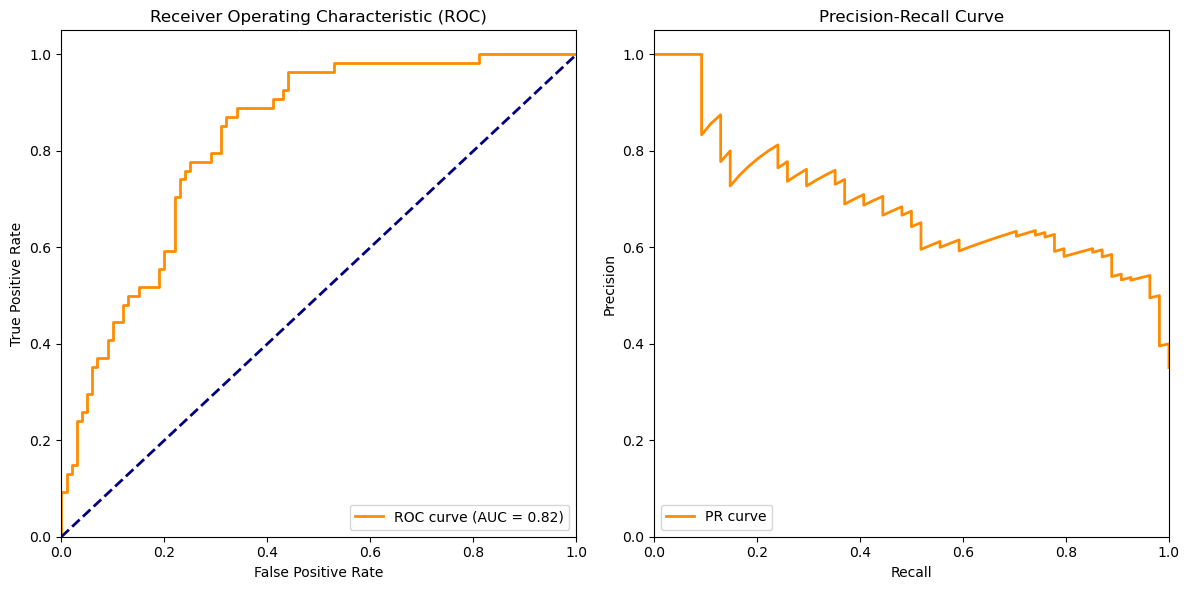

In [16]:
# Plotting the ROC Curve and Precision-Recall Curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()

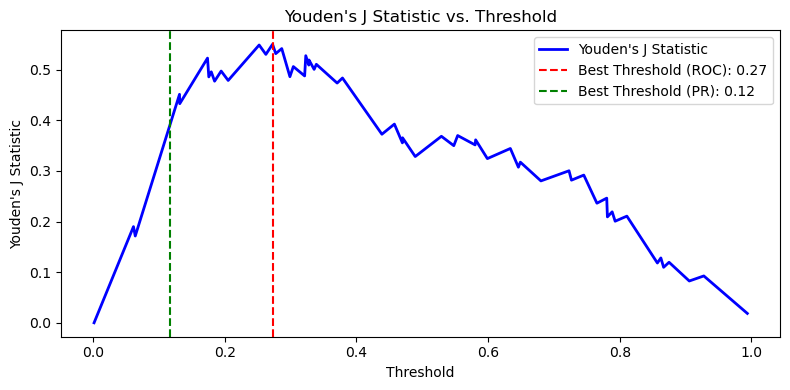

In [17]:
# Find the threshold that maximizes Youden's J statistic
plt.figure(figsize=(8, 4))
plt.plot(thresholds_roc, youden_j, color='blue', lw=2, label="Youden's J Statistic")
plt.xlabel('Threshold')
plt.ylabel("Youden's J Statistic")
plt.title("Youden's J Statistic vs. Threshold")
plt.axvline(x=optimal_threshold_roc, color='red', linestyle='--', label=f'Best Threshold (ROC): {optimal_threshold_roc:.2f}')
plt.axvline(x=optimal_threshold_pr, color='green', linestyle='--', label=f'Best Threshold (PR): {optimal_threshold_pr:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

**Observations**

- **AUC** is **0.82** in ROC curve.
- Best **ROC** Threshold is **0.28**.
- Best **PR** Threshold is **0.12**.

<a name = Section64></a>

## **6.4 Metrics for ROC Threshold**

Threshold-based Metrics (ROC Threshold):

Accuracy: 0.75

Precision: 0.59

Recall: 0.87

F1 Score: 0.71

Classification Report (ROC Threshold):



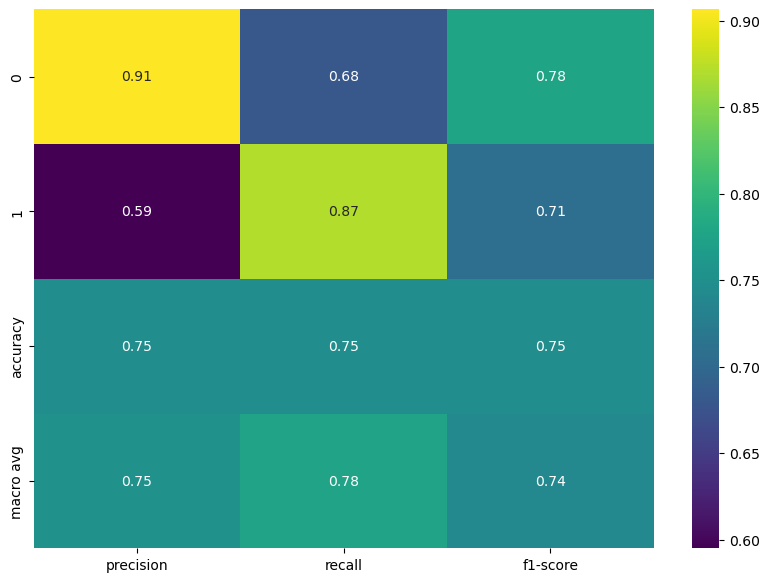


Confusion Matrix



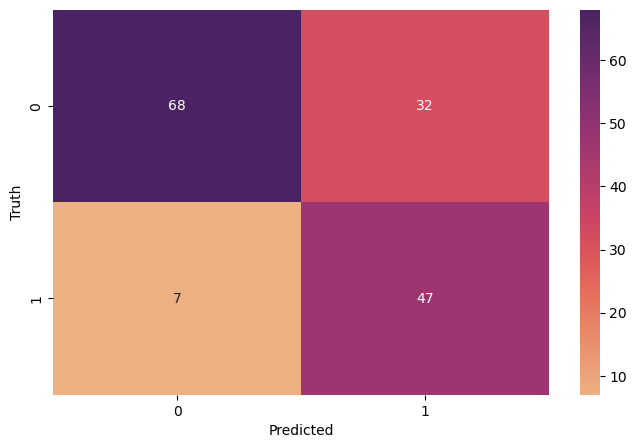

In [18]:
# Calculate and print accuracy, precision, recall, F1 score, classification report, and confusion matrix
y_pred_roc = (y_probs >= optimal_threshold_roc).astype(int)

accuracy = accuracy_score(y_test, y_pred_roc)
precision = precision_score(y_test, y_pred_roc)
recall = recall_score(y_test, y_pred_roc)
f1 = f1_score(y_test, y_pred_roc)

print(f"Threshold-based Metrics (ROC Threshold):\n")
print(f"Accuracy: {accuracy:.2f}\n")
print(f"Precision: {precision:.2f}\n")
print(f"Recall: {recall:.2f}\n")
print(f"F1 Score: {f1:.2f}\n")

print("Classification Report (ROC Threshold):\n")
report = classification_report(y_test, y_pred_roc, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10,7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap = 'viridis')
plt.show()

print("\nConfusion Matrix\n")
cm = confusion_matrix(y_test,y_pred_roc,labels = clf.classes_)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d',cmap = 'flare')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<a name = Section65></a>

## **6.5 Metrics for PR Threshold**


Threshold-based Metrics (PR Threshold):

Accuracy: 0.62

Precision: 0.48

Recall: 0.98

F1 Score: 0.65

Classification Report (PR Threshold):



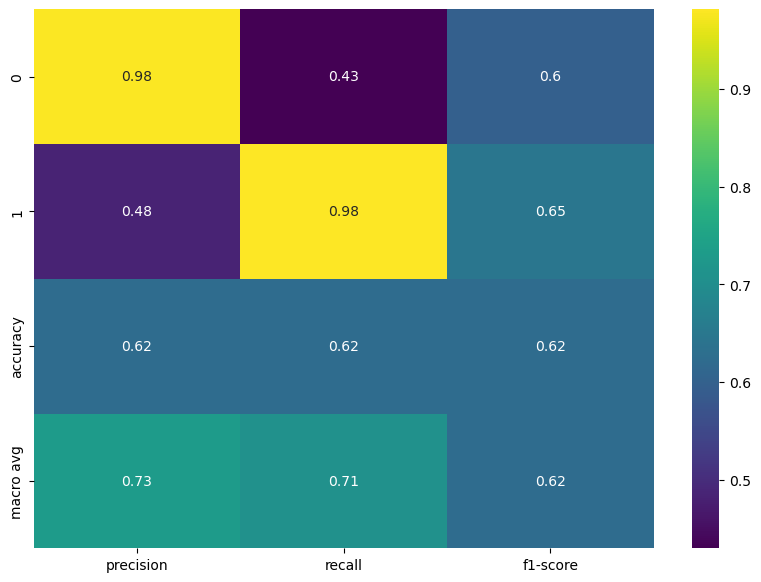


Confusion Matrix (PR Threshold)



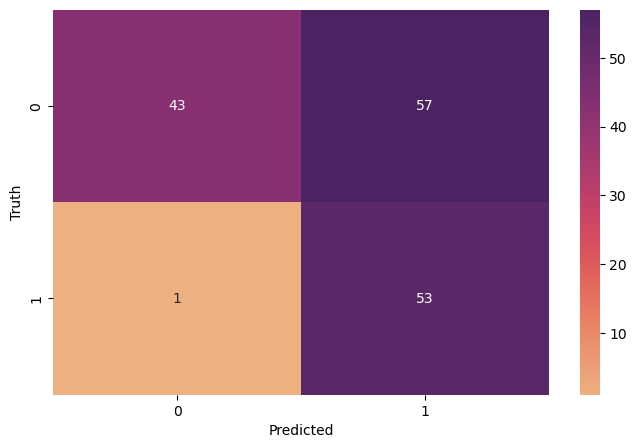

In [19]:
# Calculate and print accuracy, precision, recall, F1 score, classification report, and confusion matrix
y_pred_pr = (y_probs >= optimal_threshold_pr).astype(int)

accuracy = accuracy_score(y_test, y_pred_pr)
precision = precision_score(y_test, y_pred_pr)
recall = recall_score(y_test, y_pred_pr)
f1 = f1_score(y_test, y_pred_pr)

print(f"\nThreshold-based Metrics (PR Threshold):\n")
print(f"Accuracy: {accuracy:.2f}\n")
print(f"Precision: {precision:.2f}\n")
print(f"Recall: {recall:.2f}\n")
print(f"F1 Score: {f1:.2f}\n")

print("Classification Report (PR Threshold):\n")
report = classification_report(y_test, y_pred_pr, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10,7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap = 'viridis')
plt.show()

print("\nConfusion Matrix (PR Threshold)\n")
cm = confusion_matrix(y_test,y_pred_pr,labels = clf.classes_)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d',cmap = 'flare')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<a name = Section66></a>

## **6.6 Effects of Thresholds on Metrics**

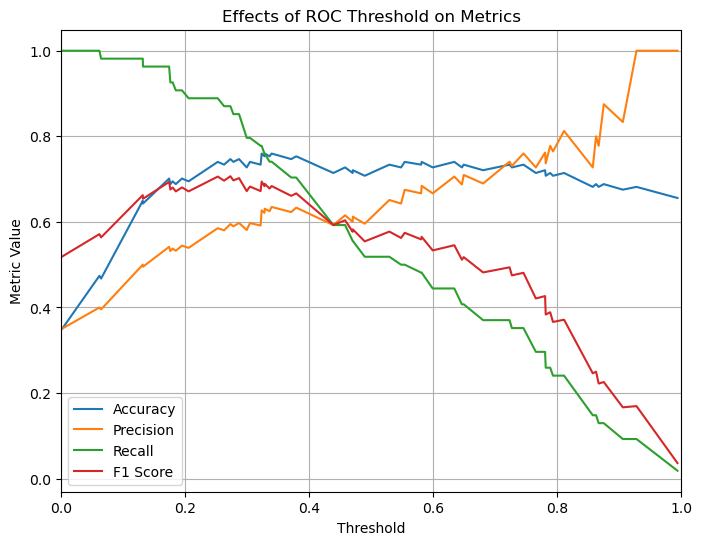

In [20]:
# Initialize empty arrays to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Calculate metrics for each threshold
for threshold in thresholds_roc:
    y_pred = (y_probs >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot the effects of ROC threshold on metrics
plt.figure(figsize=(8, 6))
plt.plot(thresholds_roc, accuracies, label='Accuracy')
plt.plot(thresholds_roc, precisions, label='Precision')
plt.plot(thresholds_roc, recalls, label='Recall')
plt.plot(thresholds_roc, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.xlim([0,1])
plt.title('Effects of ROC Threshold on Metrics')
plt.legend()
plt.grid(True)
plt.show()

**Observations**

- With increasng ROC threshold, **recall decreases**.
- **Precision increases**.
- **F1 Score** is the harmonic mean of recall and precision, so it first **increases** and **then decreases**.
- **Accuracy increases** and then slightly **decreases**.

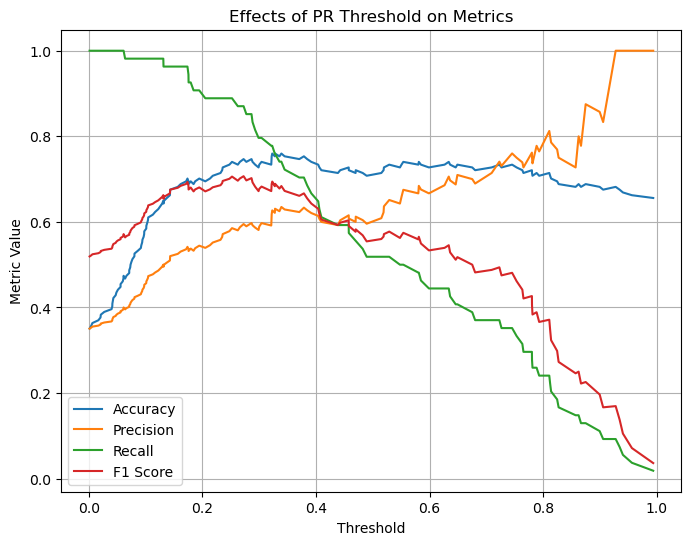

In [21]:
# Initialize empty arrays to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Calculate metrics for each threshold
for threshold in thresholds_pr:
    y_pred = (y_probs >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plot the effects of PR threshold on metrics
plt.figure(figsize=(8, 6))
plt.plot(thresholds_pr, accuracies, label='Accuracy')
plt.plot(thresholds_pr, precisions, label='Precision')
plt.plot(thresholds_pr, recalls, label='Recall')
plt.plot(thresholds_pr, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Effects of PR Threshold on Metrics')
plt.legend()
plt.grid(True)
plt.show()

**Observations**

- **Same effects** were observed with PR Threshold.

<a name = Section7></a>

---
# **7. Conclusion**
---
- With ROC Threshold, the **accuracy** of the model is **better**.
- With the help of **Youden's J statistics**, the **optimal** **threshold** for ROC and PR were found.
- We were able to **observe** the effects of thresholds on the **metrics**.